<a href="https://colab.research.google.com/github/vinay-pv/DA203o_Genre_Classification/blob/main/genre_classification_using_random_forest_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIML Project/features_augmented.csv')
print(df.shape)

(104343, 521)


In [ ]:
#df_cleaned = df.drop(columns=list(drop_col.keys()))
df_cleaned = df.drop(columns='Unnamed: 0')
df_cleaned.dropna(subset=['genre_list'], inplace=True)
print(df_cleaned.shape)

(104343, 520)


In [ ]:
#df_cleaned.to_csv("/content/sample_data/features_cleaned.csv")

In [ ]:
N = 50000

df_clean_25k = df_cleaned.sample(n=N, random_state=42)
print(df_clean_25k.shape)

X = df_clean_25k.drop(['track_id', 'genre_list'], axis=1)
y = df_clean_25k['genre_list']
print(y.shape)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(50000, 520)
(50000,)
(50000, 61)
(40000, 518)
(10000, 518)


In [ ]:
#PCA with all modes 
pca100pc = PCA(n_components=X_train.shape[1])
pca100pc.fit(X_train)

PCA(n_components=518)

Text(0, 0.5, 'Explained variance')

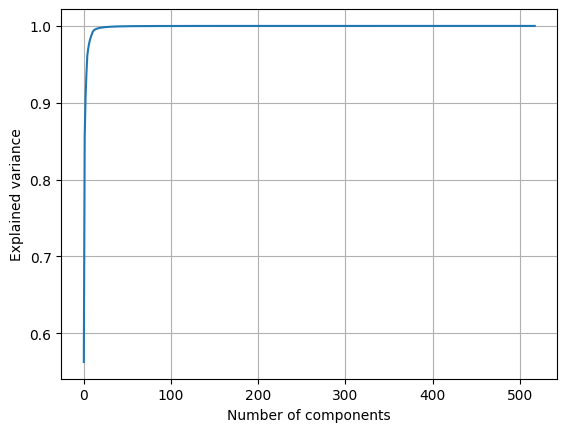

In [ ]:
#Plot variance v/s number of modes
plt.grid()
plt.plot(np.cumsum(pca100pc.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [ ]:
cumulative_variance = np.cumsum(pca100pc.explained_variance_ratio_)
feature_percent = 0.999
num_pca_modes_999 = np.searchsorted(cumulative_variance, feature_percent) + 1
print("Minimum number of modes:", num_pca_modes_999)

Minimum number of modes: 33


In [ ]:
pca999pc = PCA(n_components=num_pca_modes_999)
pca999pc.fit(X_train)
X_train_pca999pc = pca999pc.transform(X_train)
print("Train images shape:", X_train_pca999pc.shape)

Train images shape: (40000, 33)


In [ ]:
# create a random forest classifier
rfc = RandomForestClassifier(
    n_estimators=10,
    random_state=42)

# fit the model on the training data
clf = OneVsRestClassifier(rfc)
clf.fit(X_train_pca999pc, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label 34 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label 35 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                     random_state=42))

In [ ]:
X_test_pca999pc = pca999pc.transform(X_test)
print("Test images shape:", X_test_pca999pc.shape)

# make predictions on the test data
y_pred = clf.predict(X_test_pca999pc)
print("Y-pred shape:", y_pred.shape)
print("Y-test shape:", y_test.shape)

Test images shape: (10000, 33)
Y-pred shape: (10000, 61)
Y-test shape: (10000, 61)
[[1 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]


In [ ]:
# calculate and print the hamming loss and accuracy score of the model
print("Precision:", metrics.precision_score(y_test, y_pred, average='micro',zero_division=1))
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))
print("F1 Score:", metrics.f1_score(y_test, y_pred, average='micro'))
print("Hamming Loss:", metrics.hamming_loss(y_test, y_pred))
print("Coverage error:", metrics.coverage_error(y_test, y_pred))

Precision: 0.7868247015374045
Recall: 0.6581978357227337
F1 Score: 0.716786489194907
Hamming Loss: 0.15428032786885246
Coverage error: 59.8052
